In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [186]:
df= pd.read_csv("C:/Users/aryan\Documents/aiml\data/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [188]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [189]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

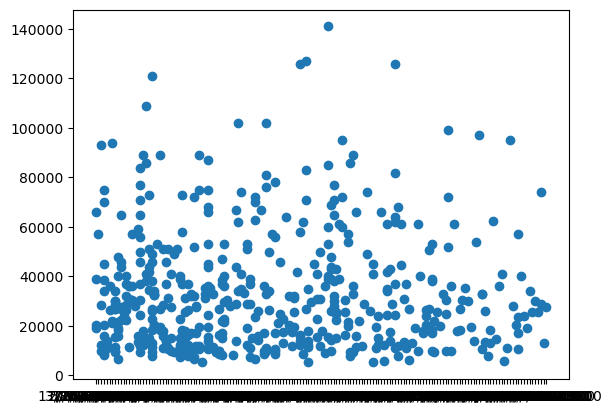

In [190]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:500],df["SalePrice"][:500])

<Axes: ylabel='Frequency'>

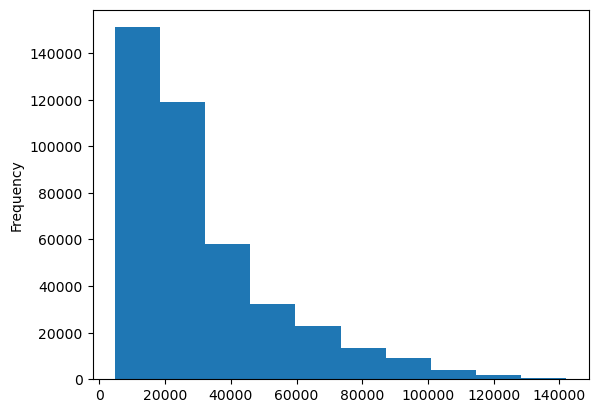

In [191]:
df.SalePrice.plot.hist()

## PARSE DATE

In [192]:
df= pd.read_csv("C:/Users/aryan\Documents/aiml\data/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])
df['saledate'].dtype


dtype('<M8[ns]')

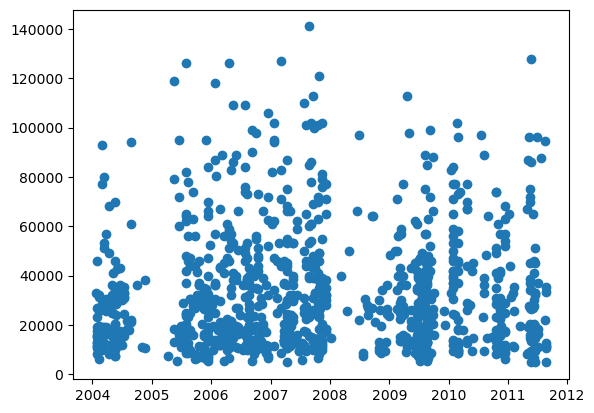

In [193]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [194]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


<Axes: >

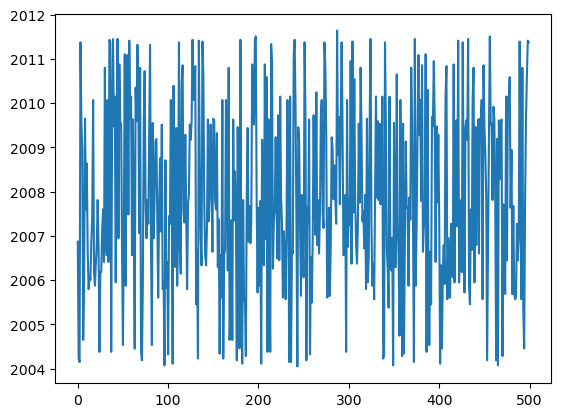

In [196]:
df.saledate[:500].plot()

In [197]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

## SORT THE DATE


In [198]:
df.sort_values(by=['saledate'],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [199]:
df_tmp=df.copy()

In [200]:
df_tmp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
df.saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [202]:
df_tmp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int64

### adding datetime parameters for saledate column

In [203]:
df_tmp["saleYear"]=df_tmp.saledate.dt.year
df_tmp["saleMonth"]=df_tmp.saledate.dt.month
df_tmp["saleDay"]=df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"]=df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"]=df_tmp.saledate.dt.dayofyear

In [204]:
df_tmp[130:150].T

,79067,173971,129791,171944,170605,79059,231683,30058,171979,117353,172005,24621,64567,274881,24585,100639,280033,172105,168665,238383
SalesID,1373291,1603515,1481920,1600508,1598441,1373277,1725735,1261468,1600556,1455591,1600588,1251671,1333522,1822108,1251607,1419052,1857993,1600712,1595375,1740289
SalePrice,8000.0,47000.0,41500.0,27000.0,20000.0,18000.0,14500.0,13500.0,35000.0,41000.0,27000.0,19500.0,102500.0,11500.0,24000.0,16000.0,8500.0,26500.0,8750.0,13000.0
MachineID,1280862,1466297,54207,1109599,1200820,1248518,1418883,1456461,1321629,1462178,1097656,1538807,1187103,1100250,1350795,1173740,1137761,1274699,1138656,1469603
ModelID,6979,8269,3350,8202,8247,6979,8960,6788,8247,4147,8202,6752,7507,10150,6788,7261,10762,8202,8050,8988
datasource,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132
auctioneerID,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
YearMade,1972,1985,1974,1983,1980,1973,1978,1982,1983,1976,1983,1986,1988,1977,1987,1973,1972,1983,1977,1979
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,NaN,NaN,254.0,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN,Low,NaN,NaN,NaN,NaN,NaN
saledate,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00


In [205]:
df_tmp.drop("saledate",axis=1,inplace=True)

In [206]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Modelling

* ## Converting strings to categories and numbers


In [207]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [208]:
for labels,content in df_tmp.items():
          if pd.api.types.is_string_dtype(df_tmp[labels]):
                  print(labels)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [209]:
for labels,content in df_tmp.items():
          if pd.api.types.is_string_dtype(df_tmp[labels]):
                  df_tmp[labels]= content.astype("category").cat.as_ordered()


In [210]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [211]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [212]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [213]:
df_tmp.isnull().sum()/len(df_tmp) 

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [214]:
df_tmp.to_csv("C:/Users/aryan/Documents/aiml/data/bluebook-for-bulldozers/train_tmp.csv")


In [215]:
df_tmp= pd.read_csv("C:/Users/aryan/Documents/aiml/data/bluebook-for-bulldozers/train_tmp.csv",low_memory=False)
df_tmp=df_tmp.drop("Unnamed: 0",axis=1)


In [216]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [217]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Fill missing values

In [218]:
df_tmp.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

In [219]:
for labels,content in df_tmp.items():
          if pd.api.types.is_string_dtype(df_tmp[labels]):
                  df_tmp[labels]= content.astype("category").cat.as_ordered()

In [220]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [221]:
for labels, contents in df_tmp.items():
          if pd.api.types.is_numeric_dtype(contents):
                  print(labels)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [222]:
for label,content in df_tmp.items():
          if pd.api.types.is_numeric_dtype(content):
                  if pd.isnull(content).sum():
                          print(labels)

20136
265194


In [223]:
for label,content in df_tmp.items():
          if pd.api.types.is_numeric_dtype(content):
                  if pd.isnull(content).sum():
                        df_tmp[label+"_is_missing"]=pd.isnull(content)

                        df_tmp[label]= content.fillna(content.median())

In [224]:
for label,content in df_tmp.items():
          if pd.api.types.is_numeric_dtype(content):
                  if pd.isnull(content).sum():
                          print(label)

In [225]:
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [226]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [227]:
for label,content in df_tmp.items():
          if not pd.api.types.is_numeric_dtype(content):
                    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [228]:
pd.Categorical(df_tmp["state"]).codes, pd.Categorical(df_tmp["UsageBand"]).codes

(array([43,  8,  8, ...,  4,  4,  4], dtype=int8),
 array([-1, -1, -1, ..., -1, -1, -1], dtype=int8))

In [229]:
for label,content in df_tmp.items():
          if not pd.api.types.is_numeric_dtype(content):
                  df_tmp[label+"_is_missing"]=pd.isnull(content)
                  df_tmp[label]= pd.Categorical(content).codes +1

In [230]:
pd.Categorical(df_tmp["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [231]:
df_tmp.columns[:100]

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleDay', 'saleDayOfWeek', 'saleDayOfYear', 'auctioneerI

In [232]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [233]:
df_tmp.T

,0,1,2,3,4,5,6,7,8,9,...,412688,412689,412690,412691,412692,412693,412694,412695,412696,412697
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,...,35000.0,7500.0,13000.0,53000.0,39000.0,16000.0,6000.0,16000.0,55000.0,34000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False,False,True,True,False,True,...,True,True,True,True,True,False,True,True,True,True
Blade_Type_is_missing,False,True,False,True,False,False,True,True,False,True,...,True,True,True,True,True,False,True,True,True,True
Travel_Controls_is_missing,False,True,False,True,False,False,True,True,False,True,...,True,True,True,True,True,False,True,True,True,True
Differential_Type_is_missing,True,False,True,False,True,True,False,False,True,True,...,False,True,True,False,True,True,True,True,True,False


Now all the data is numeric as well as our dataframe as no missing values we can fit the model


In [234]:
from sklearn.ensemble import RandomForestRegressor

In [235]:
# %%time

# model = RandomForestRegressor(n_jobs=-1,random_state=42)
# model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

In [236]:
# model.score(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

## Splliting data into Train and Validation sets

In [237]:
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [238]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [239]:
df_val= df_tmp[df_tmp["saleYear"]==2012]
df_train=df_tmp[df_tmp["saleYear"]!=2012]

len(df_val), len(df_train)

(11573, 401125)

In [240]:
df_tmp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,0,2101,...,True,True,True,True,True,False,False,False,True,True
412694,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,0,240,...,True,True,True,True,True,True,True,True,True,True
412695,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,0,627,...,True,True,True,True,True,True,True,True,True,True
412696,6266251,55000.0,509560,3357,149,99.0,1993,0.0,0,83,...,True,True,True,True,True,True,True,True,True,True


In [241]:
X_train, y_train= df_train.drop("SalePrice",axis=1),df_train["SalePrice"]
X_valid,y_valid = df_val.drop("SalePrice",axis=1),df_val["SalePrice"]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [242]:
df_tmp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,0,2101,...,True,True,True,True,True,False,False,False,True,True
412694,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,0,240,...,True,True,True,True,True,True,True,True,True,True
412695,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,0,627,...,True,True,True,True,True,True,True,True,True,True
412696,6266251,55000.0,509560,3357,149,99.0,1993,0.0,0,83,...,True,True,True,True,True,True,True,True,True,True


Here we need to evaluate by Root Mean Squared log error(RMSLE), but we know RMSE for regression

### Building an evaluation function

In [243]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test,y_preds):
          return np.sqrt(mean_squared_log_error(y_test,y_preds))


def show_scores(model):
        train_preds = model.predict(X_train)
        val_preds = model.predict(X_valid)
        scores={"Training MAE": mean_absolute_error(y_train,train_preds),
                "valid MAE": mean_absolute_error(y_valid,val_preds),
                "Traning RMSLE": rmsle(y_train,train_preds),
                "Valid RMSLE": rmsle(y_valid,val_preds),
                "Training R^2": r2_score(y_train,train_preds),
                "Valid R^2": r2_score(y_valid,val_preds)}
        return scores

### Reducing data for fitting the model

In [244]:
# model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)
# model.fit(X_train,y_train)

In [245]:
# model.score(X_train,y_train)

In [246]:
# show_scores(model)

In [247]:
# %%time
# from sklearn.model_selection import RandomizedSearchCV

# rf_grid={"n_estimators": np.arange(10,100,10),
# "max_depth": [None,3,5,10],
# "min_samples_split":np.arange(2,20,2),
# "min_samples_leaf": np.arange(1,20,2), 
# "max_features":[0.5,1,"sqrt","auto"],
# "max_samples": [10000]}

# rs_model= RandomizedSearchCV(model,param_distributions=rf_grid,n_iter=2,cv=5,verbose=True)

# rs_model.fit(X_train,y_train)

In [248]:
# rs_model.best_params_

In [249]:
# show_scores(rs_model)      

In [250]:
df_tmp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,0,2101,...,True,True,True,True,True,False,False,False,True,True
412694,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,0,240,...,True,True,True,True,True,True,True,True,True,True
412695,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,0,627,...,True,True,True,True,True,True,True,True,True,True
412696,6266251,55000.0,509560,3357,149,99.0,1993,0.0,0,83,...,True,True,True,True,True,True,True,True,True,True


In [251]:
%%time
from sklearn.ensemble import RandomForestRegressor
ideal_model= RandomForestRegressor(n_estimators=40,min_samples_leaf=1, min_samples_split=14,
max_features=0.5, n_jobs=-1,max_samples=None)


ideal_model.fit(X_train,y_train)

CPU times: total: 5min 19s
Wall time: 32.3 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [252]:
df_tmp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,0,2101,...,True,True,True,True,True,False,False,False,True,True
412694,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,0,240,...,True,True,True,True,True,True,True,True,True,True
412695,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,0,627,...,True,True,True,True,True,True,True,True,True,True
412696,6266251,55000.0,509560,3357,149,99.0,1993,0.0,0,83,...,True,True,True,True,True,True,True,True,True,True


In [253]:
show_scores(ideal_model)

{'Training MAE': 2953.273226942657,
 'valid MAE': 5954.164285404178,
 'Traning RMSLE': 0.14470632741886696,
 'Valid RMSLE': 0.24609618841435352,
 'Training R^2': 0.9588684495520302,
 'Valid R^2': 0.8824503883436874}

## Make prediction for test data


In [254]:
df_test=pd.read_csv("C:/Users/aryan/Documents/aiml/data/bluebook-for-bulldozers/Test.csv",low_memory=False,parse_dates=["saledate"])
df_test.head()


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [255]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [256]:
df_test.T

,0,1,2,3,4,5,6,7,8,9,...,12447,12448,12449,12450,12451,12452,12453,12454,12455,12456
SalesID,1227829,1227844,1227847,1227848,1227863,1227870,1227871,1227879,1227880,1227881,...,6643158,6643164,6643167,6643168,6643170,6643171,6643173,6643184,6643186,6643196
MachineID,1006309,1022817,1031560,56204,1053887,1068694,1012262,1064696,1067175,1007429,...,2556488,1894070,2558314,2558315,2558316,2558317,2558332,2558342,2558343,2558346
ModelID,3168,7271,22805,1269,22312,16747,9133,4699,22145,423,...,21434,21438,21450,21450,21450,21450,21434,21437,21437,21446
datasource,121,121,121,121,121,121,121,121,121,121,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,3,3,3,3,3,3,3,3,3,3,...,99,99,2,2,2,2,2,2,2,2
YearMade,1999,1000,2004,2006,2005,2007,2005,1000,1000,2000,...,2004,2005,2005,2005,2006,2008,2005,1000,2006,2008
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0,3670.0,6759.0,0.0,5528.0,10572.0,...,NaN,2233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,Low,High,Medium,High,Low,High,High,NaN,Low,Medium,...,NaN,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-03 00:00:00,2012-05-03 00:00:00,2012-05-03 00:00:00,2012-05-03 00:00:00,2012-05-03 00:00:00,...,2012-10-13 00:00:00,2012-10-27 00:00:00,2012-10-24 00:00:00,2012-10-24 00:00:00,2012-10-24 00:00:00,2012-10-24 00:00:00,2012-10-24 00:00:00,2012-10-24 00:00:00,2012-10-24 00:00:00,2012-09-19 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K,WB146-5,WB140,544E,650GIV,PC228USLC2,...,28N,35NX,80NX3,80NX3,80NX3,80NX3,28N,35N,35N,55N2


#### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [257]:
def preprocess_data(df):


          df["saleYear"]=df.saledate.dt.year
          df["saleMonth"]=df.saledate.dt.month
          df["saleDay"]=df.saledate.dt.day
          df["saleDayOfWeek"]=df.saledate.dt.dayofweek
          df["saleDayOfYear"]= df.saledate.dt.dayofyear

          df.drop("saledate",axis=1,inplace=True)

# FILL THE NUMERIC ROWS WITH MEDIAN     
          for label,content in df.items():
                  if pd.api.types.is_numeric_dtype(content):
                              if pd.isnull(content).sum():
                                  # ADD A BINARY COUMN WHICH TELLS US IF THE DATA WAS MISSING
                                  df[label+"_is_missing"]= pd.isnull(content)
                                  # FILL MISSING NUMERIC VALUES WITH MEDIAN
                                  df[label] =content.fillna(content.median())


                  if not pd.api.types.is_numeric_dtype(content):
                        df[label+"_is_missing"]= pd.isnull(content)
                        df[label]= pd.Categorical(content).codes+1


          return df

In [258]:
df_test = preprocess_data(df_test)
df_test.head()  

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [259]:
set(df_test.columns) - set(X_train.columns)

set()

In [260]:
set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [261]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [262]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [263]:
df_test["auctioneerID_is_missing"]=False
auc_col = df_test.pop('auctioneerID_is_missing')
df_test.insert(56, 'auctioneerID_is_missing', auc_col)

In [264]:
# X_train.index

In [265]:
set(X_train.columns)-set(df_test.columns)

set()

In [266]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [267]:
X_train.columns[56]

'auctioneerID_is_missing'

In [268]:
test_preds= ideal_model.predict(df_test)

In [269]:
test_preds

array([17585.96385821, 17544.94737918, 48519.24332592, ...,
       14818.10493854, 17046.76647194, 25110.2891104 ])

In [270]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17585.963858
1,1227844,17544.947379
2,1227847,48519.243326
3,1227848,66484.354737
4,1227863,58182.939022
...,...,...
12452,6643171,39012.395894
12453,6643173,14006.529258
12454,6643184,14818.104939
12455,6643186,17046.766472


In [271]:
# Export prediction data
df_preds.to_csv("C:/Users/aryan/Documents/aiml/data/bluebook-for-bulldozers/prediction_data.csv", index=False)

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the **target variable** (SalePrice).

In [272]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.28673749e-02, 1.88570639e-02, 4.72262891e-02, 2.12074348e-03,
       3.36388213e-03, 1.97406467e-01, 3.13967432e-03, 1.08688519e-03,
       4.57350128e-02, 4.67462342e-02, 6.70176074e-02, 4.47174496e-03,
       1.87702286e-02, 1.38718797e-01, 4.34289923e-02, 6.00526842e-03,
       2.96764555e-03, 6.23097200e-03, 3.66213519e-03, 6.26917975e-02,
       1.54918610e-03, 3.12909844e-04, 7.37953163e-04, 8.79306207e-04,
       1.09608527e-03, 2.23377647e-05, 5.42698781e-05, 6.61709310e-03,
       6.62520022e-04, 2.19608279e-03, 5.41537590e-03, 1.88310199e-03,
       3.02635382e-03, 4.04696585e-04, 3.22175679e-04, 1.33156564e-02,
       7.99863537e-04, 1.42089840e-02, 1.39492393e-03, 1.47421032e-05,
       1.02710248e-03, 8.14900657e-04, 5.50800983e-03, 5.81406621e-04,
       5.10163918e-04, 6.59738193e-04, 1.59808650e-04, 3.42207792e-03,
       1.39796076e-03, 3.81805350e-04, 1.94251120e-04, 7.32144446e-02,
       3.79251331e-03, 5.63424446e-03, 2.92165439e-03, 9.91621748e-03,
      

In [273]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

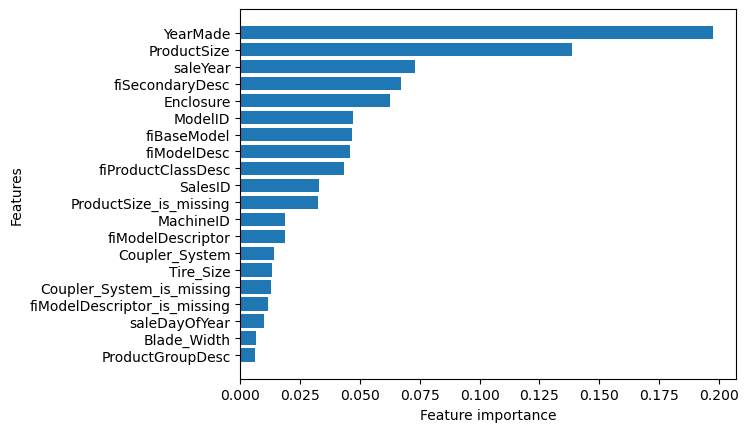

In [274]:
plot_features(X_train.columns, ideal_model.feature_importances_)
